In [1]:
%matplotlib notebook
import argparse
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import cv2
import time
import tensorflow as tf
import pickle5 as pickle
from sklearn.utils import shuffle
from models import GAN_models
from utils import get_30joints
import pickle
seq_length_train = 150 -1 - 49 - 10 
n_audio = 48
n_motion = 90 
n_z = 56

/home/vik/anaconda3/envs/lisi_code/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vik/anaconda3/envs/lisi_code/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vik/anaconda3/envs/lisi_code/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vik/anaconda3/envs/lisi_code/lib/python3

In [2]:
# shape [seq_lenght, joints]
def visualization_30joints(motion_data, scale_f=1.0, const = 0.0,
                                  az_view = 90, el_view = 0,
                                  color='black', save_video=''):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=az_view, elev=el_view)
    fig.show()
    fig.canvas.draw()
    if (save_video):
        writer = imageio.get_writer('./' +str(save_video)+'.mp4', fps=15)
    for rows in range(0, np.shape(motion_data)[0]):
        
        remove_2dims= 2
        C7   = motion_data[rows,0*3:0*3+3]
        CLAV = motion_data[rows,1*3:1*3+3]
        T10  = motion_data[rows,2*3:2*3+3]
        STRN = motion_data[rows,3*3:3*3+3]
        LSHO = motion_data[rows,4*3:4*3+3]
        LELB = motion_data[rows,5*3:5*3+3]
        LFIN = motion_data[rows,6*3:6*3+3]
        LWRA = motion_data[rows,7*3:7*3+3]
        LWRB = motion_data[rows,8*3:8*3+3]
        RSHO = motion_data[rows,9*3:9*3+3] 
        RELB = motion_data[rows,10*3:10*3+3] 
        RFIN = motion_data[rows,11*3:11*3+3] 
        RWRA = motion_data[rows,12*3:12*3+3] 
        RWRB = motion_data[rows,13*3:13*3+3]
        LFWT = motion_data[rows,14*3:14*3+3] # LASI
        LBWT = motion_data[rows,15*3:15*3+3] # LPSI
        LKNE = motion_data[rows,16*3:16*3+3] 
        LANK = motion_data[rows,17*3:17*3+3] 
        LHEE = motion_data[rows,18*3:18*3+3] 
        LTOE = motion_data[rows,19*3:19*3+3]
        RFWT = motion_data[rows,20*3:20*3+3] # RASI
        RBWT = motion_data[rows,21*3:21*3+3] # RPSI
        RKNE = motion_data[rows,22*3:22*3+3] 
        RANK = motion_data[rows,23*3:23*3+3] 
        RHEE = motion_data[rows,24*3:24*3+3] 
        RTOE = motion_data[rows,25*3:25*3+3]
        LBHD = motion_data[rows,26*3:26*3+3] 
        LFHD = motion_data[rows,27*3:27*3+3] 
        RBHD = motion_data[rows,28*3:28*3+3] 
        RFHD = motion_data[rows,29*3:29*3+3]
                    
        Head = (LBHD + LFHD + RBHD + RFHD)/4
        Neck = (C7 + CLAV)/2
        Torsor = (T10 + STRN)/2
        LHip = (LFWT + LBWT)/2
        RHip = (RFWT + RBWT)/2
        CHip = (LHip+RHip)/2
        ax.clear()
        ax.grid(False)
        plt.axis('off')
        ax.plot([Head[0],Neck[0]],[Head[1],Neck[1]],[Head[2],Neck[2]], c=color)
        ax.plot([Neck[0],Torsor[0]],[Neck[1],Torsor[1]],[Neck[2],Torsor[2]], c=color)

        ax.plot([Neck[0],LSHO[0]],[Neck[1],LSHO[1]],[Neck[2],LSHO[2]], lw=2, c=color)
        ax.plot([LSHO[0],LELB[0]],[LSHO[1],LELB[1]],[LSHO[2],LELB[2]], lw=2, c=color)
        ax.plot([LELB[0],LFIN[0]],[LELB[1],LFIN[1]],[LELB[2],LFIN[2]], lw=2, c=color)

        ax.plot([Neck[0],RSHO[0]],[Neck[1],RSHO[1]],[Neck[2],RSHO[2]], lw=2, c=color)
        ax.plot([RSHO[0],RELB[0]],[RSHO[1],RELB[1]],[RSHO[2],RELB[2]], lw=2, c=color)
        ax.plot([RELB[0],RFIN[0]],[RELB[1],RFIN[1]],[RELB[2],RFIN[2]], lw=2, c=color)

        ax.plot([Torsor[0],CHip[0]],[Torsor[1],CHip[1]],[Torsor[2],CHip[2]], lw=2, c=color)

        ax.plot([CHip[0],LHip[0]],[CHip[1],LHip[1]],[CHip[2],LHip[2]], lw=2, c=color)
        ax.plot([LHip[0],LKNE[0]],[LHip[1],LKNE[1]],[LHip[2],LKNE[2]], lw=2, c=color)
        ax.plot([LKNE[0], LANK[0]],[LKNE[1], LANK[1]],[LKNE[2], LANK[2]], lw=2, c=color)

        ax.plot([CHip[0],RHip[0]],[CHip[1],RHip[1]],[CHip[2],RHip[2]], lw=2, c=color)
        ax.plot([RHip[0],RKNE[0]],[RHip[1],RKNE[1]],[RHip[2],RKNE[2]], lw=2, c=color)
        ax.plot([RKNE[0], RANK[0]],[RKNE[1], RANK[1]],[RKNE[2], RANK[2]], lw=2, c=color)

        ax.set_title("Frame "+ str(rows))
        fig.canvas.draw() 
        if (save_video):
            img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
            img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            writer.append_data(img)
    if (save_video):
        writer.close()

        
def create_session():
    return tf.Session(config=tf.ConfigProto(device_count={"CPU":3, "GPU":2}, 
                                            inter_op_parallelism_threads=0,
                                            allow_soft_placement=True,
                                            gpu_options={'allow_growth': True, 'visible_device_list': "0"},
                                            intra_op_parallelism_threads=0))


def get_arguments():
    parser = argparse.ArgumentParser()
    parser.add_argument('--rnn_size',  default=1024)
    parser.add_argument('--num_layers', default=2)
    parser.add_argument('--rnn_keep_list', default=[1.0, 1.0, 1.0])
    sys.argv = ['-f'] # only in jupyter notebook
    return parser.parse_args()

def data_generator(data_type, data_path):
    if data_type not in ['training', 'testing']:
        raise (ValueError, "'{0}' is not an appropriate data type.".format(data_type))

    if data_type == 'training':
        with open(data_path, 'rb') as f:
            data = pickle.load(f)

        p_FC1 = np.array(data['train_motion_FC1'], dtype="float32")  
        p_FC2 = np.array(data['train_motion_FC2'], dtype="float32")  
        a_FC1 = np.array(data['train_audio'], dtype="float32")
        
        p_FC1, p_FC2, a_FC1 = shuffle(p_FC1, p_FC2, a_FC1, random_state=0)
        p_FC1 = get_30joints(p_FC1)
        p_FC2 = get_30joints(p_FC2)

        num_train = int(np.shape(p_FC1)[0]*9/10)
        
        ini_pose_FC1 = p_FC1[0:num_train,0,:]
        motion_FC1 = p_FC1[0:num_train,1:seq_length_train+1,:]
        motion_FC2 = p_FC2[0:num_train,1:seq_length_train+1,:]
        audio_FC1  = a_FC1[0:num_train,1:seq_length_train+1,:]
        audio_FC1 = np.expand_dims(audio_FC1, axis=3)
        print("data_generator: ", data_type)
        print("ini_pose_FC1", np.shape(ini_pose_FC1), "motion_FC1: ", np.shape(motion_FC1), "audio_FC1: ", np.shape(audio_FC1), "motion_FC2: ", np.shape(motion_FC2),)
        return ini_pose_FC1, motion_FC1, audio_FC1, motion_FC2

    if data_type == 'testing':
        with open(data_path, 'rb') as f:
            data = pickle.load(f)

        p_FC1 = np.array(data['train_motion_FC1'], dtype="float32")  
        p_FC2 = np.array(data['train_motion_FC2'], dtype="float32")  
        a_FC1 = np.array(data['train_audio'], dtype="float32")
        
        p_FC1, p_FC2, a_FC1 = shuffle(p_FC1, p_FC2, a_FC1, random_state=0)
        p_FC1 = get_30joints(p_FC1)
        p_FC2 = get_30joints(p_FC2)
        
        num_test = int(np.shape(p_FC1)[0]*1/10)

        ini_pose_FC1 = p_FC1[0:num_test,0,:]
        motion_FC1 = p_FC1[-num_test:,1:seq_length_train+1,:]
        motion_FC2 = p_FC2[-num_test:,1:seq_length_train+1,:]
        audio_FC1  = a_FC1[-num_test:,1:seq_length_train+1,:]
        audio_FC1 = np.expand_dims(audio_FC1, axis=3)
        print("data_generator: ", data_type)
        print("ini_pose_FC1", np.shape(ini_pose_FC1), "motion_FC1: ", np.shape(motion_FC1), "audio_FC1: ", np.shape(audio_FC1), "motion_FC2: ", np.shape(motion_FC2))
        return ini_pose_FC1, motion_FC1, audio_FC1, motion_FC2

In [3]:
init_step_mot = tf.placeholder(tf.float32, [None, n_motion], name="init_pose") 
motion_inputs = tf.placeholder(tf.float32, shape=[None, seq_length_train, n_motion], name="motion_inputs") 
audio_inputs  = tf.placeholder(tf.float32, shape=[None, seq_length_train, n_audio*5, 1], name="audio_inputs") 
motion_inputs_FC2 = tf.placeholder(tf.float32, shape=[None, seq_length_train, n_motion], name="motion_inputs_FC2") 
z_noise = tf.placeholder(tf.float32, [None, n_z], name="noise_vector") 

args = get_arguments()
n_embcontext = 256
n_embmotion = 128

model = GAN_models(
    1,
    seq_length_train,
    n_audio,
    n_motion,
    n_embcontext,
    n_embmotion,
    args.rnn_size, 
    args.num_layers,
    args.rnn_keep_list)

gen_motion, audio_emb, context_emb = model._build_mot_rnn_graph(audio_inputs, init_step_mot, motion_inputs_FC2, z_noise, train_type=0, residual_connection=False)



Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
rnn_layer:  0 1.0
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
rnn_layer:  1 1.0
rnn_layer:  2 1.0
rnn_layer:  1 1.0
rnn_layer:  2 1.0


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
mus_graph:  0
mus_conv_graph
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


mus_graph:  1
mus_conv_graph


mus_graph:  2
mus_conv_graph


mus_graph:  3
mus_conv_graph


mus_graph:  4
mus_conv_graph


mus_graph:  5
mus_conv_graph


mus_graph:  6
mus_conv_graph


mus_graph:  7
mus_conv_graph


mus_graph:  8
mus_conv_graph


mus_graph:  9
mus_conv_graph


mus_graph:  10
mus_conv_graph


mus_graph:  11
mus_conv_graph


mus_graph:  12
mus_conv_graph


mus_graph:  13
mus_conv_graph


mus_graph:  14
mus_conv_graph


mus_graph:  15
mus_conv_graph


mus_graph:  16
mus_conv_graph


mus_graph:  17
mus_conv_graph


mus_graph:  18
mus_conv_graph


mus_graph:  19
mus_conv_graph


mus_graph:  20
mus_conv_graph


mus_graph:  21
mus_conv_graph


mus_graph:  22
mus_conv_graph


mus_graph:  23
mus_conv_graph


mus_graph:  24
mus_conv_graph


mus_graph:  25
mus_conv_graph


mus_graph:  26
mus_conv_graph


mus_graph:  27
mus_conv_graph


mus_graph:  28
mus_conv_graph


mus_graph:  29
mus_conv_graph


mus_graph:  30
mus_conv_graph


mus_graph:  31
mus_conv_graph


mus_graph:  32
mus_conv_graph


mus_graph:  33
mus_conv_graph


mus_graph:  34
mus_conv_graph


mus_graph:  35
mus_conv_graph


mus_graph:  36
mus_conv_graph


mus_graph:  37
mus_conv_graph


mus_graph:  38
mus_conv_graph


mus_graph:  39
mus_conv_graph


mus_graph:  40
mus_conv_graph


mus_graph:  41
mus_conv_graph


mus_graph:  42
mus_conv_graph


mus_graph:  43
mus_conv_graph


mus_graph:  44
mus_conv_graph


mus_graph:  45
mus_conv_graph


mus_graph:  46
mus_conv_graph


mus_graph:  47
mus_conv_graph


mus_graph:  48
mus_conv_graph


mus_graph:  49
mus_conv_graph


mus_graph:  50
mus_conv_graph


mus_graph:  51
mus_conv_graph


mus_graph:  52
mus_conv_graph


mus_graph:  53
mus_conv_graph


mus_graph:  54
mus_conv_graph


mus_graph:  55
mus_conv_graph


mus_graph:  56
mus_conv_graph


mus_graph:  57
mus_conv_graph


mus_graph:  58
mus_conv_graph


mus_graph:  59
mus_conv_graph


mus_graph:  60
mus_conv_graph


mus_graph:  61
mus_conv_graph


mus_graph:  62
mus_conv_graph


mus_graph:  63
mus_conv_graph


mus_graph:  64
mus_conv_graph


mus_graph:  65
mus_conv_graph


mus_graph:  66
mus_conv_graph


mus_graph:  67
mus_conv_graph


mus_graph:  68
mus_conv_graph


mus_graph:  69
mus_conv_graph


mus_graph:  70
mus_conv_graph


mus_graph:  71
mus_conv_graph


mus_graph:  72
mus_conv_graph


mus_graph:  73
mus_conv_graph


mus_graph:  74
mus_conv_graph


mus_graph:  75
mus_conv_graph


mus_graph:  76
mus_conv_graph


mus_graph:  77
mus_conv_graph


mus_graph:  78
mus_conv_graph


mus_graph:  79
mus_conv_graph


mus_graph:  80
mus_conv_graph


mus_graph:  81
mus_conv_graph


mus_graph:  82
mus_conv_graph


mus_graph:  83
mus_conv_graph


mus_graph:  84
mus_conv_graph


mus_graph:  85
mus_conv_graph


mus_graph:  86
mus_conv_graph


mus_graph:  87
mus_conv_graph


mus_graph:  88
mus_conv_graph


mus_graph:  89
mus_conv_graph


In [9]:
%ls -al

total 20
drwxrwxr-x  5 vik vik 4096 Mar 18 14:33 ./
drwxr-xr-x 15 vik vik 4096 Mar 18 14:32 ../
drwxrwxr-x  6 vik vik 4096 Mar 19 11:39 fullmodels/
drwxrwxr-x  3 vik vik 4096 Mar 18 14:45 .idea/
drwxrwxr-x  7 vik vik 4096 Mar 18 14:29 PreProcessData/


In [10]:
model_path = "./fullmodels//model_SessALL/"
dataset ="./PreProcessData/preprocess_Sess01/LISI.pickle"
model_index = 5000
sess = create_session()
checkpoint = model_path + "checkpoint-" + str(model_index)+"/checkpoint-" + str(model_index)
gan_saver = tf.train.Saver(var_list=tf.trainable_variables())
gan_saver.restore(sess, checkpoint)

INFO:tensorflow:Restoring parameters from ./fullmodels//model_SessALL/checkpoint-5000/checkpoint-5000


2024-03-19 11:40:22.594516: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or set the envvar XLA_FLAGS=--xla_hlo_profile.


In [11]:
test_ini_pose_FC1, test_motion_FC1, test_audio_FC1, test_motion_FC2 = data_generator(data_type="testing", data_path=dataset)

data_generator:  testing
ini_pose_FC1 (172, 90) motion_FC1:  (172, 90, 90) audio_FC1:  (172, 90, 240, 1) motion_FC2:  (172, 90, 90)


generated_FC1 (1, 90, 90)


<IPython.core.display.Javascript object>


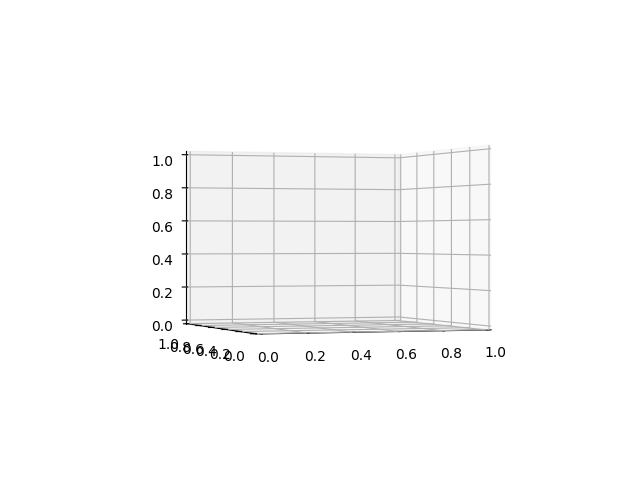

ValueError: Could not find a backend to open `./testFC1_Gen3_30.mp4`` with iomode `w?`.
Based on the extension, the following plugins might add capable backends:
  FFMPEG:  pip install imageio[ffmpeg]
  pyav:  pip install imageio[pyav]

In [12]:
i = 30
t_ini_pose_FC1 = np.expand_dims(test_ini_pose_FC1[i], axis=0)
t_motion_FC1 = np.expand_dims(test_motion_FC1[i], axis=0)
t_audio_FC1 = np.expand_dims(test_audio_FC1[i], axis=0)
t_motion_FC2 = np.expand_dims(test_motion_FC2[i], axis=0)
t_z_noise = np.random.normal(0, 70, (1, n_z))

generated_FC1 = sess.run(gen_motion, feed_dict={init_step_mot: t_ini_pose_FC1,
                                                audio_inputs: t_audio_FC1,
                                                motion_inputs_FC2: t_motion_FC2,
                                                z_noise: t_z_noise})
print("generated_FC1", np.shape(generated_FC1))
generated_FC1 = np.squeeze(generated_FC1)
motion_FC1 = np.squeeze(t_motion_FC1)
visualization_30joints(generated_FC1, 
                              az_view= -110, el_view=0, color='red', 
                              save_video='testFC1_Gen3_'+str(i))

<IPython.core.display.Javascript object>


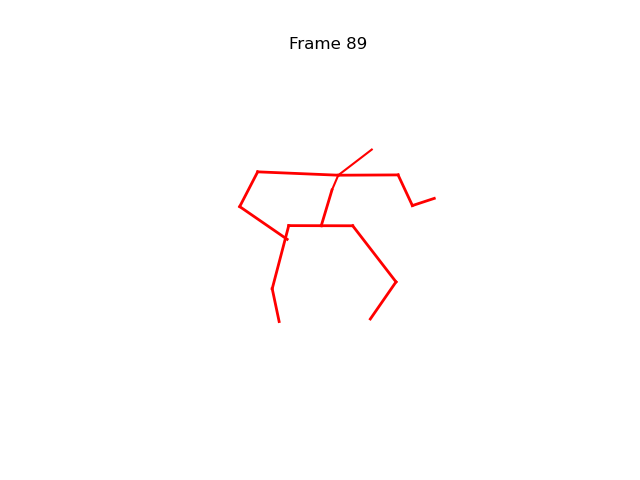

-f:79: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [7]:
visualization_30joints(motion_FC1, 
                              az_view= -100, el_view=0, color='red', 
                              save_video='testFC1_GT_'+str(i))